<a href="https://colab.research.google.com/github/WangariKimotho/Zindi_Mentorship/blob/main/GBV_Datasets_AFD_Kimosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###AFD SOLUTIONS-ZINDI


This is data cleaning and visualization task on the World Bank dataset named economic opportunities under the Zindi challenge of AFD solutions done during my Zindi Mentorship program 2021.

Importing libraries

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 5.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn import metrics

sns.set(style="darkgrid") 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![link](https://images.unsplash.com/photo-1579621970588-a35d0e7ab9b6?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mzl8fG1vbmV5fGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60)

Photo by Visual Stories || Micheile on Unsplash
  

###Loading the dataset

In [ ]:
econ_opp = pd.read_csv("https://raw.githubusercontent.com/WangariKimotho/Zindi_Mentorship/main/Economic%20Opportunities_Data.csv")
econ_opp.head()

,Series Name,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Account ownership at a financial institution o...,Angola,AGO,22.33164597,..,..,..,..,..,..
1,Account ownership at a financial institution o...,Benin,BEN,13.5968771,..,..,28.58588791,..,..,..
2,Account ownership at a financial institution o...,Botswana,BWA,48.73712158,..,..,46.788517,..,..,..
3,Account ownership at a financial institution o...,Burkina Faso,BFA,12.64900875,..,..,34.4989357,..,..,..
4,Account ownership at a financial institution o...,Burundi,BDI,6.726228237,..,..,..,..,..,..


In [ ]:
econ_opp.columns

Index(['Series Name', 'Country Name', 'Country Code', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [ ]:
econ_opp.shape

(7849, 10)

In [ ]:
econ_opp.isna().sum()

Series Name      3
Country Name     5
Country Code     5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
dtype: int64

In [ ]:
econ_opp.dropna(how="any")

,Series Name,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Account ownership at a financial institution o...,Angola,AGO,22.33164597,..,..,..,..,..,..
1,Account ownership at a financial institution o...,Benin,BEN,13.5968771,..,..,28.58588791,..,..,..
2,Account ownership at a financial institution o...,Botswana,BWA,48.73712158,..,..,46.788517,..,..,..
3,Account ownership at a financial institution o...,Burkina Faso,BFA,12.64900875,..,..,34.4989357,..,..,..
4,Account ownership at a financial institution o...,Burundi,BDI,6.726228237,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...
7839,The ages at which men and women can retire wit...,Algeria,DZA,0,0,0,0,0,0,..
7840,The ages at which men and women can retire wit...,"Egypt, Arab Rep.",EGY,1,1,1,1,1,1,..
7841,The ages at which men and women can retire wit...,Djibouti,DJI,0,0,0,0,0,0,..
7842,The ages at which men and women can retire wit...,Libya,LBY,0,0,0,0,0,0,..


In [ ]:
econ_opp['Series Name'].value_counts()

Own-account workers, male (% of male employment) (modeled ILO estimate)                       53
There is legislation on sexual harassment in employment (1=yes; 0=no)                         53
Own-account workers, female (% of female employment) (modeled ILO estimate)                   53
Unemployment with basic education, male (% of male labor force with basic education)          53
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)                 53
                                                                                              ..
Women Business and the Law Index Score (scale 1-100)                                          53
Mandatory retirement age, male                                                                53
Unemployment with advanced education, male (% of male labor force with advanced education)    53
Last Updated: 12/21/2020                                                                       1
Data from database: Gender Sta

In [ ]:
econ_opp['Country Name'].nunique()

53

In [ ]:
econ_opp = econ_opp.drop("Country Code",axis=1)
econ_opp

,Series Name,Country Name,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Account ownership at a financial institution o...,Angola,22.33164597,..,..,..,..,..,..
1,Account ownership at a financial institution o...,Benin,13.5968771,..,..,28.58588791,..,..,..
2,Account ownership at a financial institution o...,Botswana,48.73712158,..,..,46.788517,..,..,..
3,Account ownership at a financial institution o...,Burkina Faso,12.64900875,..,..,34.4989357,..,..,..
4,Account ownership at a financial institution o...,Burundi,6.726228237,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
7844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7847,Data from database: Gender Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
econ_opp.rename(
    columns = ({ '2014 [YR2014]':'2014','2015 [YR2015]':'2015','2016 [YR2016]':'2016','2017 [YR2017]':'2017','2018 [YR2018]':'2018' , '2019 [YR2019]':'2019','2020 [YR2020]':'2020' }),inplace=True
)
econ_opp

,Series Name,Country Name,2014,2015,2016,2017,2018,2019,2020
0,Account ownership at a financial institution o...,Angola,22.33164597,..,..,..,..,..,..
1,Account ownership at a financial institution o...,Benin,13.5968771,..,..,28.58588791,..,..,..
2,Account ownership at a financial institution o...,Botswana,48.73712158,..,..,46.788517,..,..,..
3,Account ownership at a financial institution o...,Burkina Faso,12.64900875,..,..,34.4989357,..,..,..
4,Account ownership at a financial institution o...,Burundi,6.726228237,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
7844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7847,Data from database: Gender Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
econ_opp = econ_opp.dropna(how = "any")
econ_opp

,Series Name,Country Name,2014,2015,2016,2017,2018,2019,2020
0,Account ownership at a financial institution o...,Angola,22.33164597,..,..,..,..,..,..
1,Account ownership at a financial institution o...,Benin,13.5968771,..,..,28.58588791,..,..,..
2,Account ownership at a financial institution o...,Botswana,48.73712158,..,..,46.788517,..,..,..
3,Account ownership at a financial institution o...,Burkina Faso,12.64900875,..,..,34.4989357,..,..,..
4,Account ownership at a financial institution o...,Burundi,6.726228237,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
7839,The ages at which men and women can retire wit...,Algeria,0,0,0,0,0,0,..
7840,The ages at which men and women can retire wit...,"Egypt, Arab Rep.",1,1,1,1,1,1,..
7841,The ages at which men and women can retire wit...,Djibouti,0,0,0,0,0,0,..
7842,The ages at which men and women can retire wit...,Libya,0,0,0,0,0,0,..


Tidying the datframe so that each column represents a variable and each row a unique entry.

In [ ]:
econ_opp = econ_opp.melt(id_vars=['Series Name','Country Name'],var_name='Year',value_name='Series val')

In [ ]:
econ_opp2=econ_opp.pivot(index=['Country Name','Year'], columns='Series Name', values='Series val')
econ_opp2.reset_index(inplace=True)

In [ ]:
econ_opp2

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (national estimate)","Employment to population ratio, ages 15-24, total (%) (national estimate)",Female professional and technical workers (% of total),"Financial institution account,female(% age 15+)","Financial institution account,male(% age 15+)",Firms with female participation in ownership (% of firms),"Informal employment, female (% of total non-agricultural employment)","Informal employment, male (% of total non-agricultural employment)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (national estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)",...,The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Time-related underemployment, female (% of employment)","Time-related underemployment, male (% of employment)","Unemployment with advanced education, female (% of female labor force with advanced education)","Unemployment with advanced education, male (% of male labor force with advanced education)","Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)","Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployme

In [ ]:
econ_opp2.dtypes

Series Name
Country Name                                                                                                               object
Year                                                                                                                       object
A woman can register a business in the same way as a man (1=yes; 0=no)                                                     object
Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)    object
Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)      object
                                                                                                                            ...  
Women who own a house both alone and jointly (% of women age 15-49)                                                        object
Women who own a house jointly (% of women age 15-49)                          

The data has some misiing values that are denoted with 2 dots, we need to replace this with a way that Pandas understands that this is missing data.

In [ ]:
econ_opp2 = econ_opp2.replace(r'..', np.nan, regex=False)


In [ ]:
econ_opp2

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (national estimate)","Employment to population ratio, ages 15-24, total (%) (national estimate)",Female professional and technical workers (% of total),"Financial institution account,female(% age 15+)","Financial institution account,male(% age 15+)",Firms with female participation in ownership (% of firms),"Informal employment, female (% of total non-agricultural employment)","Informal employment, male (% of total non-agricultural employment)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (national estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)",...,The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Time-related underemployment, female (% of employment)","Time-related underemployment, male (% of employment)","Unemployment with advanced education, female (% of female labor force with advanced education)","Unemployment with advanced education, male (% of male labor force with advanced education)","Unemployment with basic education, female (% of female labor force with basic education)","Unemployment with basic education, male (% of male labor force with basic education)","Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployme

Count the NaN/ missing values for each column.

In [ ]:
econ_opp2.isnull().sum().sort_values(ascending=True)

Series Name
Country Name                                                                            0
Year                                                                                    0
Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)             7
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)           7
Wage and salaried workers, female (% of female employment) (modeled ILO estimate)       7
                                                                                     ... 
Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)    368
Female professional and technical workers (% of total)                                371
Length of paid parental leave for father (days)                                       371
Length of paid parental leave for mother (days)                                       371
Length of paid shared parental leave (days)                                           37

In [ ]:
def drop_cols(data,colums):
  """ 
  function to check for the columns with more than half the values as missing and then dropping those.
  Returns the new dataframe after columns have been dropped.
  """
  for cols in colums:
    if (data[cols].isnull().sum()/len(data[cols]) > 0.5):
      data.drop([cols],inplace=True,axis=1)
  return data 

In [ ]:
drop_cols(econ_opp2,econ_opp2.columns)

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total",Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law prohibits discrimination in employment based on gender (1=yes; 0=no),"Own-account workers, female (% of female employment) (modeled ILO estimate)","Own-account workers, male (% of male employment) (modeled ILO estimate)",Paid leave is available to fathers (1=yes; 0=no),Paid leave of at least 14 weeks is available to women (1=yes; 0=no),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)",The ages at which men and women can retire with full pension benefits are equal (1=yes; 0=no),The ages at which men and women can retire with partial pension benefits are equal (1=yes; 0=no),The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO 

In [ ]:
econ_opp2 = econ_opp2.dropna(how="any")
econ_opp2

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total",Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law prohibits discrimination in employment based on gender (1=yes; 0=no),"Own-account workers, female (% of female employment) (modeled ILO estimate)","Own-account workers, male (% of male employment) (modeled ILO estimate)",Paid leave is available to fathers (1=yes; 0=no),Paid leave of at least 14 weeks is available to women (1=yes; 0=no),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)",The ages at which men and women can retire with full pension benefits are equal (1=yes; 0=no),The ages at which men and women can retire with partial pension benefits are equal (1=yes; 0=no),The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO 

In [ ]:
def convert_types(df):
  """
  Function to convert the  variables to type their most appropriate type, in this case either category or float. Her case we use the string function to check for the criteria.
  There are only 2 categories:1=yes or 0=no. The rest of the variables are translated as type float64. We use the astype() python function.
  Returns the new dataframe.

  """
  df_cols = df.columns[2:]
  x = df_cols.str.contains("1=yes")
  x2 = []
  for idx,val in enumerate(x):
    if val==True:
      x2.append(idx)
      df = df.astype(
          {
              df.columns[idx+2]:'category'
          }
      )
    else:  
      df = df.astype(
          {
              df.columns[idx+2]:'float64'
          }
      )
  return df


In [ ]:
econ_opp2 =convert_types(econ_opp2)
econ_opp2

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total",Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law prohibits discrimination in employment based on gender (1=yes; 0=no),"Own-account workers, female (% of female employment) (modeled ILO estimate)","Own-account workers, male (% of male employment) (modeled ILO estimate)",Paid leave is available to fathers (1=yes; 0=no),Paid leave of at least 14 weeks is available to women (1=yes; 0=no),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)",The ages at which men and women can retire with full pension benefits are equal (1=yes; 0=no),The ages at which men and women can retire with partial pension benefits are equal (1=yes; 0=no),The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO 

In [ ]:
econ_opp2.dtypes

Series Name
Country Name                                                                             object
Year                                                                                     object
A woman can register a business in the same way as a man (1=yes; 0=no)                 category
Contributing family workers, female (% of female employment) (modeled ILO estimate)     float64
Contributing family workers, male (% of male employment) (modeled ILO estimate)         float64
                                                                                         ...   
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)           float64
Women Business and the Law Index Score (scale 1-100)                                    float64
Women are able to work in the same industries as men (1=yes; 0=no)                     category
Women can work in jobs deemed dangerous in the same way as men (1=yes; 0=no)           category
Women can work the same nigh

In [ ]:
econ_opp2 = econ_opp2.astype(
    {
       econ_opp2.columns[1]:'int64'}
)


In [ ]:
econ_opp2.dtypes

Series Name
Country Name                                                                             object
Year                                                                                      int64
A woman can register a business in the same way as a man (1=yes; 0=no)                 category
Contributing family workers, female (% of female employment) (modeled ILO estimate)     float64
Contributing family workers, male (% of male employment) (modeled ILO estimate)         float64
                                                                                         ...   
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)           float64
Women Business and the Law Index Score (scale 1-100)                                    float64
Women are able to work in the same industries as men (1=yes; 0=no)                     category
Women can work in jobs deemed dangerous in the same way as men (1=yes; 0=no)           category
Women can work the same nigh

In [ ]:
econ_opp2.describe()

Series Name,Year,"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)","Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Own-account workers, female (% of female employment) (modeled ILO estimate)","Own-account workers, male (% of male employment) (modeled ILO estimate)",Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)","Time required to start a business, female (days)","Time required to start a business, male (days)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)",Women Business and the Law Index Score (scale 1-100)
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,3.050000e+02,305.000000,3.050000e+02,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,2016.508197,23.217852,11.502941,50.967213,50.956393,1.423646,3.363882,45.858112,44.330380,9.490675,18.163574,44.651249,37.506095,52.425449,67.703728,35.627279,41.938698,41.326387,48.100318,57.293039,58.985554,72.834561,74.212990,3.832148e+06,43

In [ ]:
econ_opp2.head()

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total",Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law prohibits discrimination in employment based on gender (1=yes; 0=no),"Own-account workers, female (% of female employment) (modeled ILO estimate)","Own-account workers, male (% of male employment) (modeled ILO estimate)",Paid leave is available to fathers (1=yes; 0=no),Paid leave of at least 14 weeks is available to women (1=yes; 0=no),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)",The ages at which men and women can retire with full pension benefits are equal (1=yes; 0=no),The ages at which men and women can retire with partial pension benefits are equal (1=yes; 0=no),The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO 

Having tidied and cleaned our data we can now proceed to visualization.

###Visualization

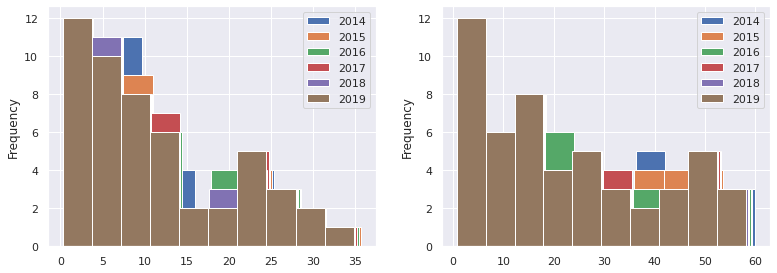

In [ ]:
plt.subplot(331)
econ_opp2.groupby('Year')['Contributing family workers, male (% of male employment) (modeled ILO estimate)'].plot(kind='hist',legend=True,figsize=(20,15))

plt.subplot(332)
econ_opp2.groupby('Year')['Contributing family workers, female (% of female employment) (modeled ILO estimate)'].plot(kind='hist',legend=True,figsize=(20,15))
#plt.subplot(333)

plt.show()

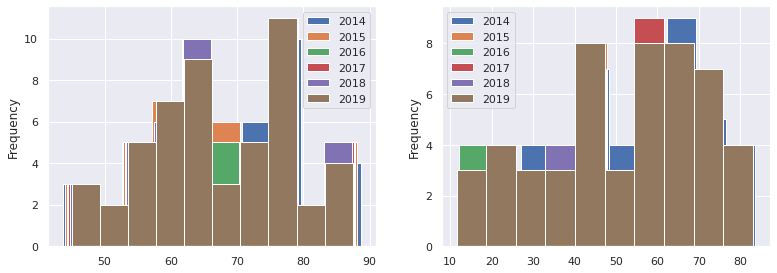

In [ ]:
plt.subplot(331)
econ_opp2.groupby('Year')['Employment to population ratio, 15+, male (%) (modeled ILO estimate)'].plot(kind='hist',legend=True,figsize=(20,15))

plt.subplot(332)
econ_opp2.groupby('Year')['Employment to population ratio, 15+, female (%) (modeled ILO estimate)'].plot(kind='hist',legend=True,figsize=(20,15))
#plt.subplot(333)

plt.show()

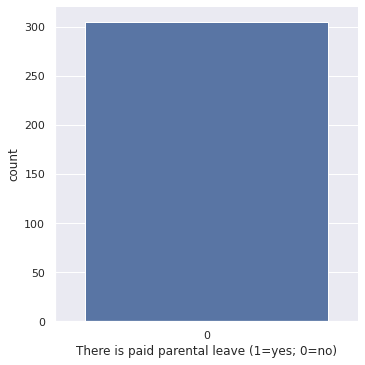

In [ ]:
sns.catplot(x="There is paid parental leave (1=yes; 0=no)",data=econ_opp2,kind="count")

The above plot shows that from the data covering the years 2014-2019 no African country actually offers paid parental leave.

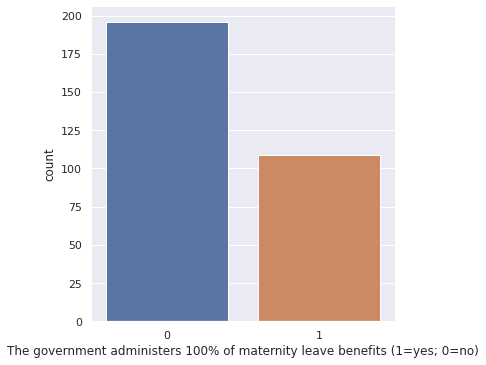

In [ ]:
sns.catplot(x="The government administers 100% of maternity leave benefits (1=yes; 0=no)",data=econ_opp2,kind="count")


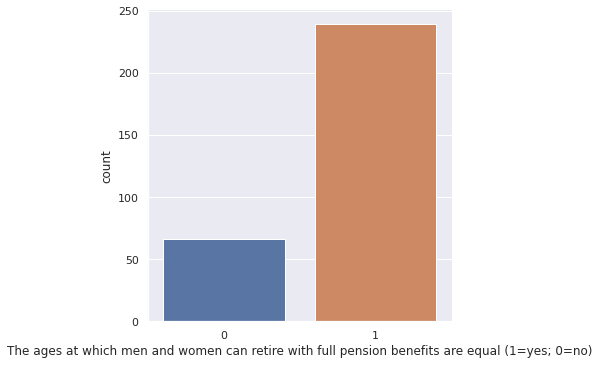

In [ ]:
sns.catplot(x="The ages at which men and women can retire with full pension benefits are equal (1=yes; 0=no)",data=econ_opp2,kind="count")

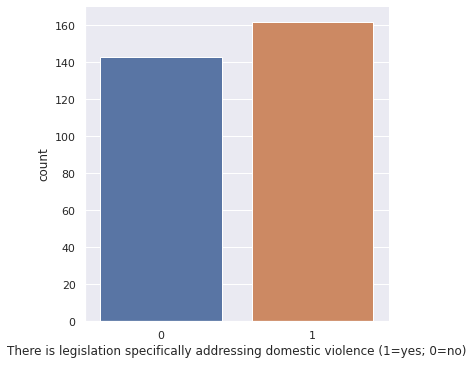

In [ ]:
sns.catplot(x="There is legislation specifically addressing domestic violence (1=yes; 0=no)",data=econ_opp2,kind="count")

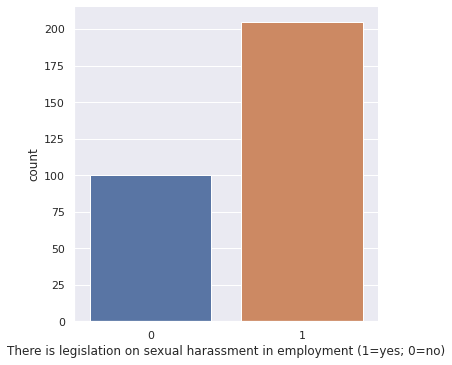

In [ ]:
sns.catplot(x="There is legislation on sexual harassment in employment (1=yes; 0=no)",data=econ_opp2,kind="count")

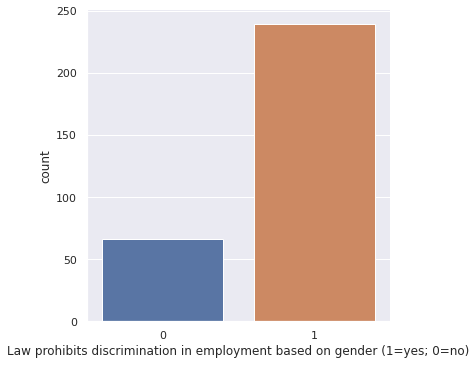

In [ ]:
sns.catplot(x="Law prohibits discrimination in employment based on gender (1=yes; 0=no)",data=econ_opp2,kind="count")

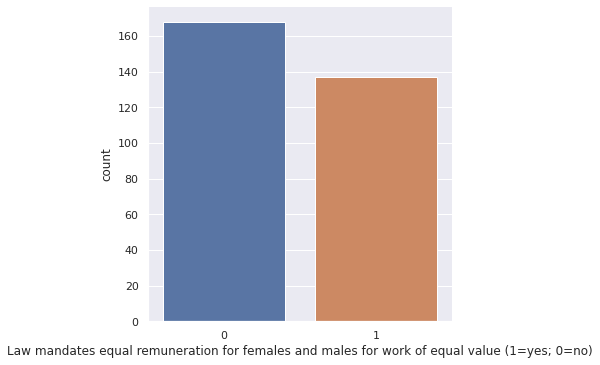

In [ ]:
sns.catplot(x="Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)",data=econ_opp2,kind="count")

Here we can observe that in mosst places the law does not mandate for equal remuneration for females and male for work of equal value. This is actually an indication that most countries' legislations does not take the inititative to ensure equality of the genders when it comes to wages.

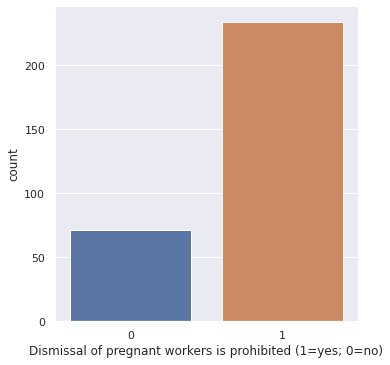

In [ ]:
sns.catplot(x="Dismissal of pregnant workers is prohibited (1=yes; 0=no)",data=econ_opp2,kind="count")

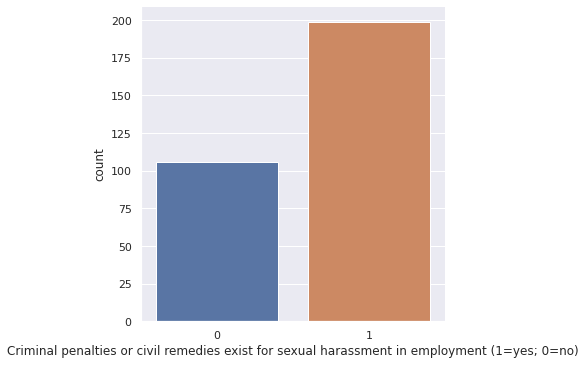

In [ ]:
sns.catplot(x="Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)",data=econ_opp2,kind="count")

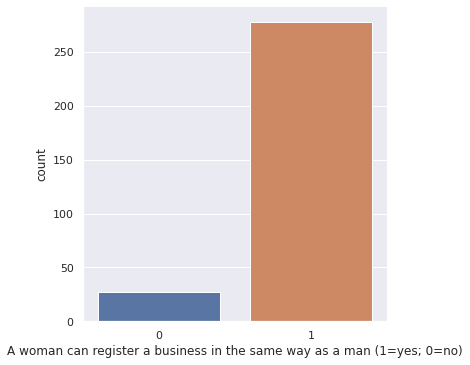

In [ ]:
sns.catplot(x="A woman can register a business in the same way as a man (1=yes; 0=no)",data=econ_opp2,kind="count")

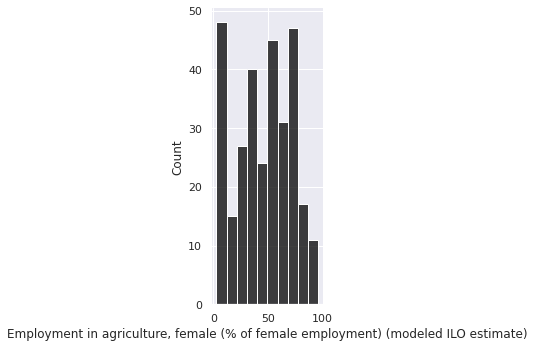

In [ ]:
sns.displot(econ_opp2['Employment in agriculture, female (% of female employment) (modeled ILO estimate)'],kde=False,color='black')

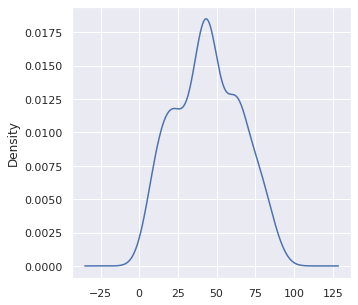

In [ ]:
plt.figure(figsize=(5,5))
econ_opp2['Employment in agriculture, male (% of male employment) (modeled ILO estimate)'].plot(kind='density')

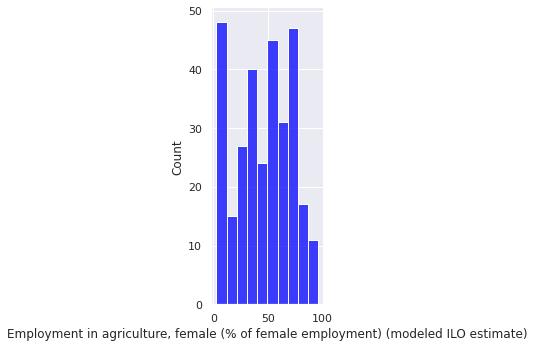

In [ ]:
sns.displot(econ_opp2['Employment in agriculture, female (% of female employment) (modeled ILO estimate)'],color='blue')

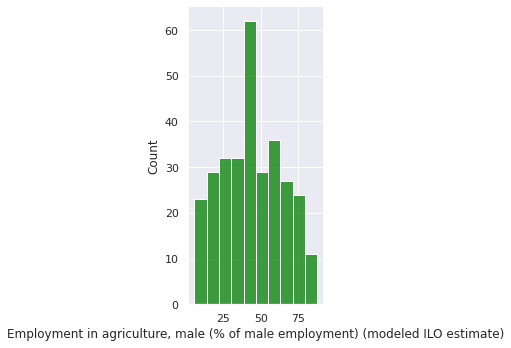

In [ ]:
sns.displot(econ_opp2['Employment in agriculture, male (% of male employment) (modeled ILO estimate)'],color='green')

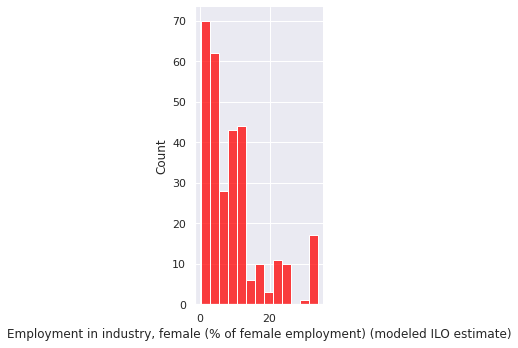

In [ ]:
sns.displot(econ_opp2['Employment in industry, female (% of female employment) (modeled ILO estimate)'],color='red')

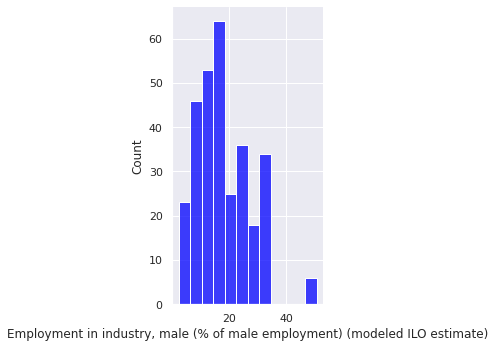

In [ ]:
sns.displot(econ_opp2['Employment in industry, male (% of male employment) (modeled ILO estimate)'],color='blue')

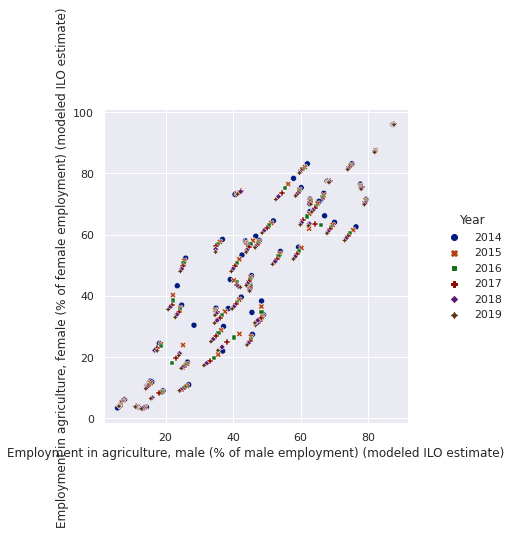

In [ ]:
sns.relplot(x="Employment in agriculture, male (% of male employment) (modeled ILO estimate)", y="Employment in agriculture, female (% of female employment) (modeled ILO estimate)",hue="Year",style="Year",palette="dark",data=econ_opp2);

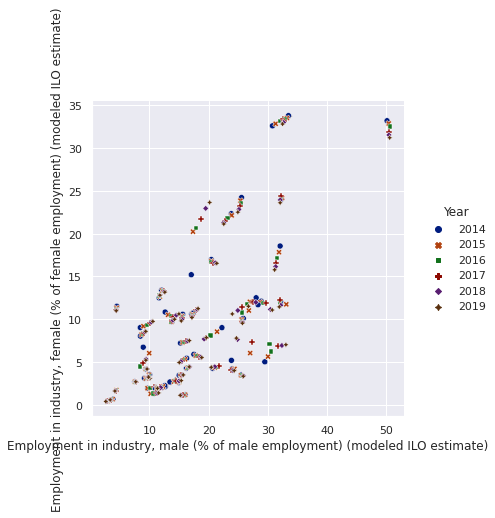

In [ ]:
sns.relplot(x="Employment in industry, male (% of male employment) (modeled ILO estimate)", y="Employment in industry, female (% of female employment) (modeled ILO estimate)",hue="Year",style="Year",palette="dark",data=econ_opp2);

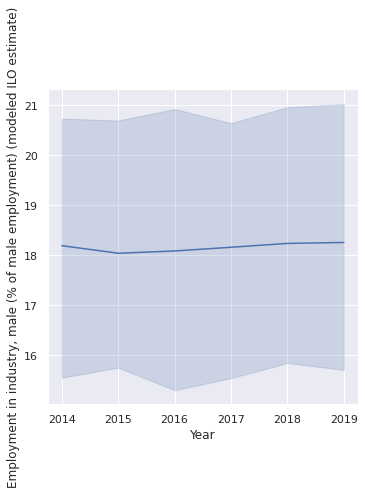

In [ ]:
sns.relplot(x="Year", y="Employment in industry, male (% of male employment) (modeled ILO estimate)", kind="line", data=econ_opp2)#plt.subplot(333)

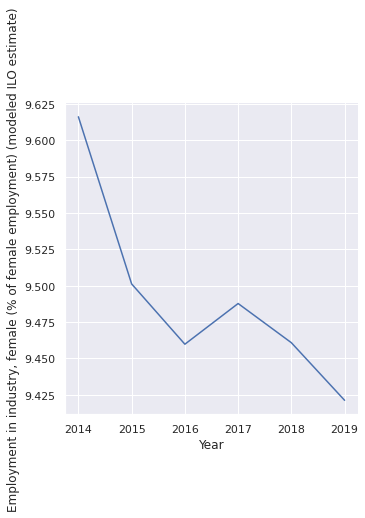

In [ ]:
sns.relplot(x="Year", y="Employment in industry, female (% of female employment) (modeled ILO estimate)", kind="line", ci=None, data=econ_opp2)

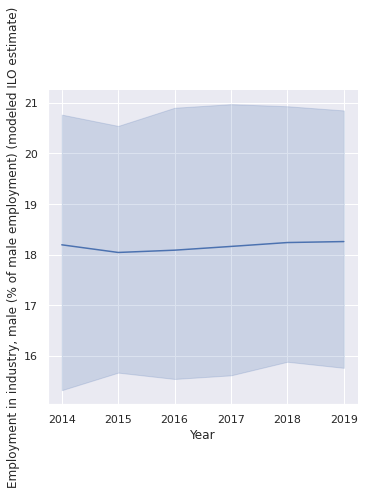

In [ ]:
sns.relplot(x="Year", y="Employment in industry, male (% of male employment) (modeled ILO estimate)", kind="line", data=econ_opp2)

Text(0.5, 1.0, 'Male employers')

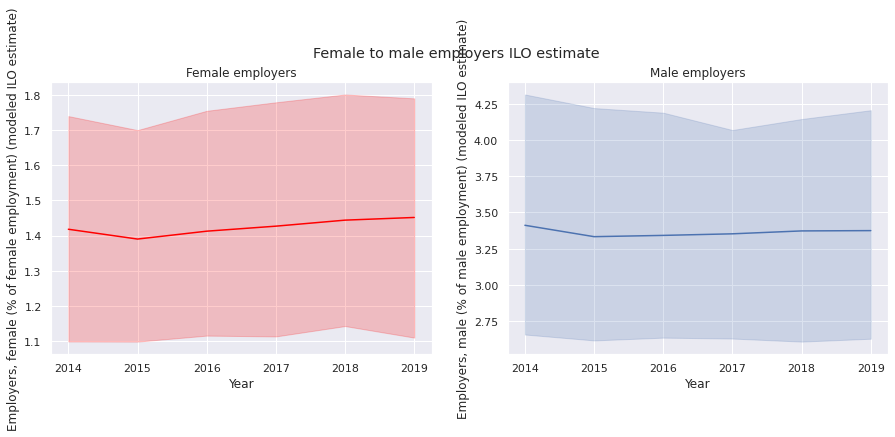

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Female to male employers ILO estimate')

sns.lineplot(ax=axes[0],x='Year',y='Employers, female (% of female employment) (modeled ILO estimate)',data=econ_opp2,color="red")
axes[0].set_title('Female employers')

sns.lineplot(ax=axes[1],x='Year',y='Employers, male (% of male employment) (modeled ILO estimate)',data=econ_opp2)
axes[1].set_title('Male employers')


From above we observe that the trend over the years for the female to male employers is similar with a steep drop observed in 2016. However, the percentage for females(on the leftt) begins from a much lower value of 0.22, a value even when the male \% of employment dropped in 2016 did not get that low. 

What this says is that there is a low percentage of female employment, and even when a dip in the economy is dipped(a sshown here in 2016), the drop for women is much worse.

###Preprocessing to build a model.

In [ ]:

le = preprocessing.LabelEncoder()
econ_opp2['Country Name'] = le.fit_transform(econ_opp2['Country Name'])
econ_opp2['Year'] = le.fit_transform(econ_opp2['Year'])
econ_opp2.head()

Series Name,Country Name,Year,A woman can register a business in the same way as a man (1=yes; 0=no),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no),Dismissal of pregnant workers is prohibited (1=yes; 0=no),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)","Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)","Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total",Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),Law prohibits discrimination in employment based on gender (1=yes; 0=no),"Own-account workers, female (% of female employment) (modeled ILO estimate)","Own-account workers, male (% of male employment) (modeled ILO estimate)",Paid leave is available to fathers (1=yes; 0=no),Paid leave of at least 14 weeks is available to women (1=yes; 0=no),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)",The ages at which men and women can retire with full pension benefits are equal (1=yes; 0=no),The ages at which men and women can retire with partial pension benefits are equal (1=yes; 0=no),The government administers 100% of maternity leave benefits (1=yes; 0=no),The mandatory retirement age for men and women are equal (1=yes; 0=no),There are periods of absence due to child care accounted for in pension benefits (1=yes; 0=no),There is legislation on sexual harassment in employment (1=yes; 0=no),There is legislation specifically addressing domestic violence (1=yes; 0=no),There is paid parental leave (1=yes; 0=no),"Time required to start a business, female (days)","Time required to start a business, male (days)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO 

In [ ]:
category_cols = econ_opp2.columns[(econ_opp2.columns).str.contains("1=yes")==True]

econ_opp2 = pd.get_dummies(econ_opp2,prefix_sep="_",columns = category_cols)

scaler = MinMaxScaler(feature_range = (0,1))
econ_opp2 = scaler.fit_transform(econ_opp2)
econ_opp2

array([[0.        , 0.        , 0.03596211, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.2       , 0.03376725, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.4       , 0.03169056, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.6       , 0.17538706, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.8       , 0.17349609, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.17582604, ..., 1.        , 0.        ,
        1.        ]])

Finally used the Kmeans clustering method

In [ ]:
kmeans = KMeans(init = 'k-means++', n_clusters = 4, n_init = 10)
kmeans.fit(econ_opp2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Here we us the silhouette score to measure how well the model performs.

In [ ]:
scores =[]
score = metrics.silhouette_score(econ_opp2, kmeans.labels_,
metric = 'euclidean', sample_size = len(econ_opp2))
print("Silhouette score =", score)
scores.append(score)

Silhouette score = 0.14557825616031128


Since the silhouette score is closer to 0, our model is quite okay...but still subject to improverment.